# **1. Perkenalan Dataset**


Untuk proyek ini, saya memilih menggunakan Wine Quality Dataset (Red Wine), diakses langsung dari UCI Machine Learning Repository. Saya sengaja memuat data langsung via URL alih-alih menyimpannya secara lokal di repository GitHub saya, karena cara ini memastikan pipeline Continuous Integration (CI) yang saya bangun di Kriteria 3 selalu menggunakan sumber data yang konsisten dan andal.

Dataset ini memiliki karakteristik sebagai berikut:
1. Jumlah Row (Instansi): Terdapat 1599 baris data anggur merah.
2. Jumlah Feature (Atribut Input): Terdapat 11 feature (kolom) fisikokimia, seperti fixed acidity, volatile acidity, pH, dan alcohol.

3. Variabel Target: Memiliki 1 variabel output (quality) yang saya binerisasi menjadi masalah klasifikasi (Anggur Baik vs Buruk).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# --- Pustaka Utama ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Pustaka untuk Preprocessing ---
# (Kita akan menggunakannya di Bagian 5)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Pengaturan Tampilan ---
%matplotlib inline
sns.set(style="whitegrid", palette="pastel")
pd.set_option('display.max_columns', None)

print("Semua library berhasil di-import.")

Semua library berhasil di-import.


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# --- Tentukan URL Dataset ---
# Mengimpor langsung dari URL repositori UCI
RAW_DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# --- Memuat Data ---
try:
    # Dataset Wine Quality menggunakan ';' sebagai delimiter
    df_raw = pd.read_csv(RAW_DATA_URL, sep=';')
    print(f"Dataset berhasil dimuat dari URL.")
    print(f"Jumlah baris awal: {len(df_raw)}")
    print(f"Jumlah kolom awal: {df_raw.shape[1]}")

except Exception as e:
    print(f"ERROR: Gagal memuat data dari URL.")
    print(f"Detail Error: {e}")
    print("Pastikan koneksi internet Anda aktif.")

# --- Tampilkan 5 baris pertama ---
if 'df_raw' in locals():
    print("\n--- 5 Baris Pertama Data Mentah ---")
    display(df_raw.head())

Dataset berhasil dimuat dari URL.
Jumlah baris awal: 1599
Jumlah kolom awal: 12

--- 5 Baris Pertama Data Mentah ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 4.1 Cek Tipe data dan Cek Missing Values

In [3]:
if 'df_raw' in locals():
    print("--- Informasi Tipe Data dan Missing Values (df.info()) ---")
    df_raw.info()

    print("\n--- Cek Missing Values (Jumlah) ---")
    print(df_raw.isnull().sum())


--- Informasi Tipe Data dan Missing Values (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

--- Cek Missing Values (Jumlah) ---
fixed acidity           0
vola

Langkah pertama EDA adalah memanggil fungsi .info() untuk memvalidasi struktur data. Dari hasil ini, saya mengonfirmasi bahwa seluruh 11 fitur dan 1 target variabel memiliki tipe data numerik (float atau integer). Poin terpenting, saya juga memverifikasi bahwa tidak ada missing values (data kosong) sama sekali di 1599 baris data

##4.2 Cek Data Duplikat

In [4]:
if 'df_raw' in locals():
    print("Cek Data Duplikat ")
    duplicate_count = df_raw.duplicated().sum()
    print(f"Jumlah data duplikat yang ditemukan: {duplicate_count} baris")

Cek Data Duplikat 
Jumlah data duplikat yang ditemukan: 240 baris


Setelah memastikan data lengkap, saya melakukan pengecekan integritas data menggunakan .duplicated(). Hasilnya mengungkap bahwa di dataset ini terdapat 240 baris data duplikat yang identik.

## 4.3 Statistik deskriptif

In [5]:
if 'df_raw' in locals():
    print("--- Statistik Deskriptif (df.describe()) ---")
    # Transpose (T) agar lebih mudah dibaca jika kolom terlalu banyak
    display(df_raw.describe().T)

--- Statistik Deskriptif (df.describe()) ---


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Untuk mendapatkan gambaran umum tentang sebaran data, saya menggunakan .describe(). Metode ini memberikan ringkasan statistik (seperti mean, median, standar deviasi, dan kuartil) untuk setiap fitur. Dari sini, terlihat bahwa rentang nilai antar fitur sangat bervariasi (misalnya, total sulfur dioxide memiliki max 289, sementara chlorides memiliki max 0.611), yang mengonfirmasi bahwa proses scaling di tahap preprocessing mutlak diperlukan.

##4.4 Univariate Analysisi

### 4.4.1 Distribusi Variabel Target 'Quality'

--- 4. Univariate Analysis (Variabel Target 'quality') ---


/tmp/ipython-input-2391561291.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df_raw, palette='viridis')


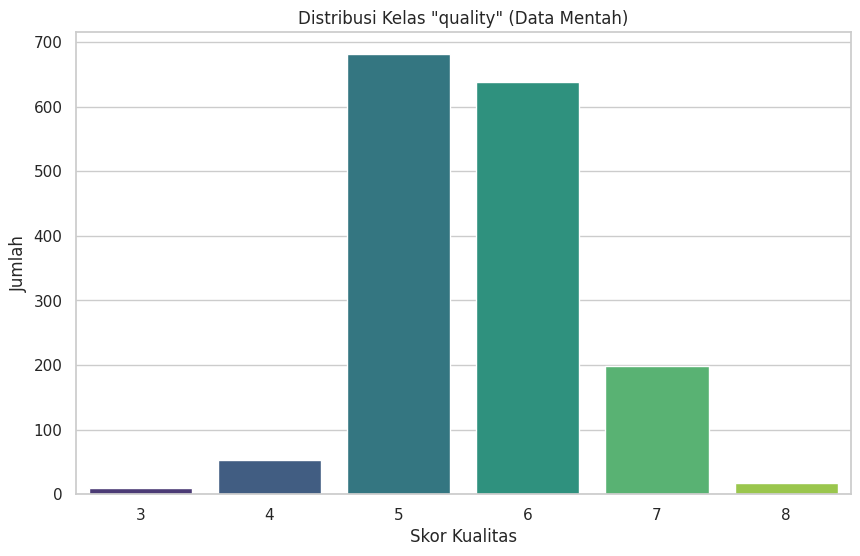

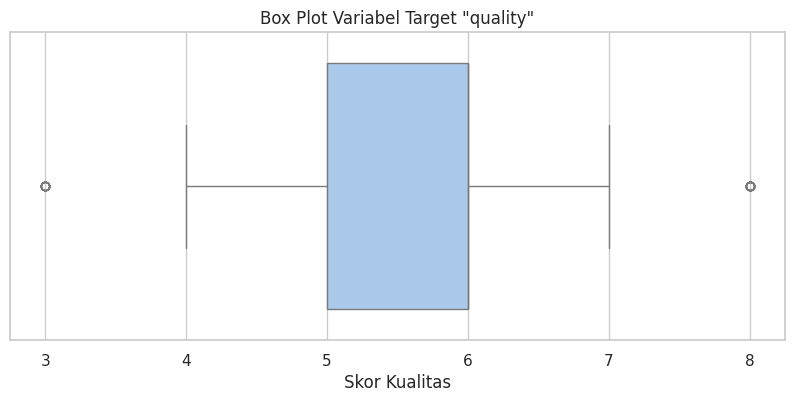

Distribusi kelas sangat tidak seimbang (imbalanced).
Sebagian besar anggur memiliki kualitas 5 dan 6.


In [6]:
if 'df_raw' in locals():
    print("--- 4. Univariate Analysis (Variabel Target 'quality') ---")

    # Visualisasi Distribusi Target (Countplot)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='quality', data=df_raw, palette='viridis')
    plt.title('Distribusi Kelas "quality" (Data Mentah)')
    plt.xlabel('Skor Kualitas')
    plt.ylabel('Jumlah')
    plt.show()

    # Visualisasi Outlier Target (Boxplot)
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_raw['quality'])
    plt.title('Box Plot Variabel Target "quality"')
    plt.xlabel('Skor Kualitas')
    plt.show()

    print("Distribusi kelas sangat tidak seimbang (imbalanced).")
    print("Sebagian besar anggur memiliki kualitas 5 dan 6.")

Saya kemudian fokus menganalisis variabel target (quality) secara terpisah. Menggunakan countplot dan boxplot, saya menemukan bahwa distribusi data sangat tidak seimbang (imbalanced). Mayoritas absolut data terkumpul pada skor kualitas 5 dan 6, sementara skor 3, 4, 7, dan 8 sangat sedikit. Temuan ini memperkuat keputusan saya untuk menyederhanakan masalah menjadi klasifikasi biner (Baik vs Buruk) di tahap preprocessing.

### 4.4.2. Distribusi Fitur Input

--- 5. Univariate Analysis (Distribusi Fitur Input) ---
Menampilkan histogram untuk setiap fitur input:


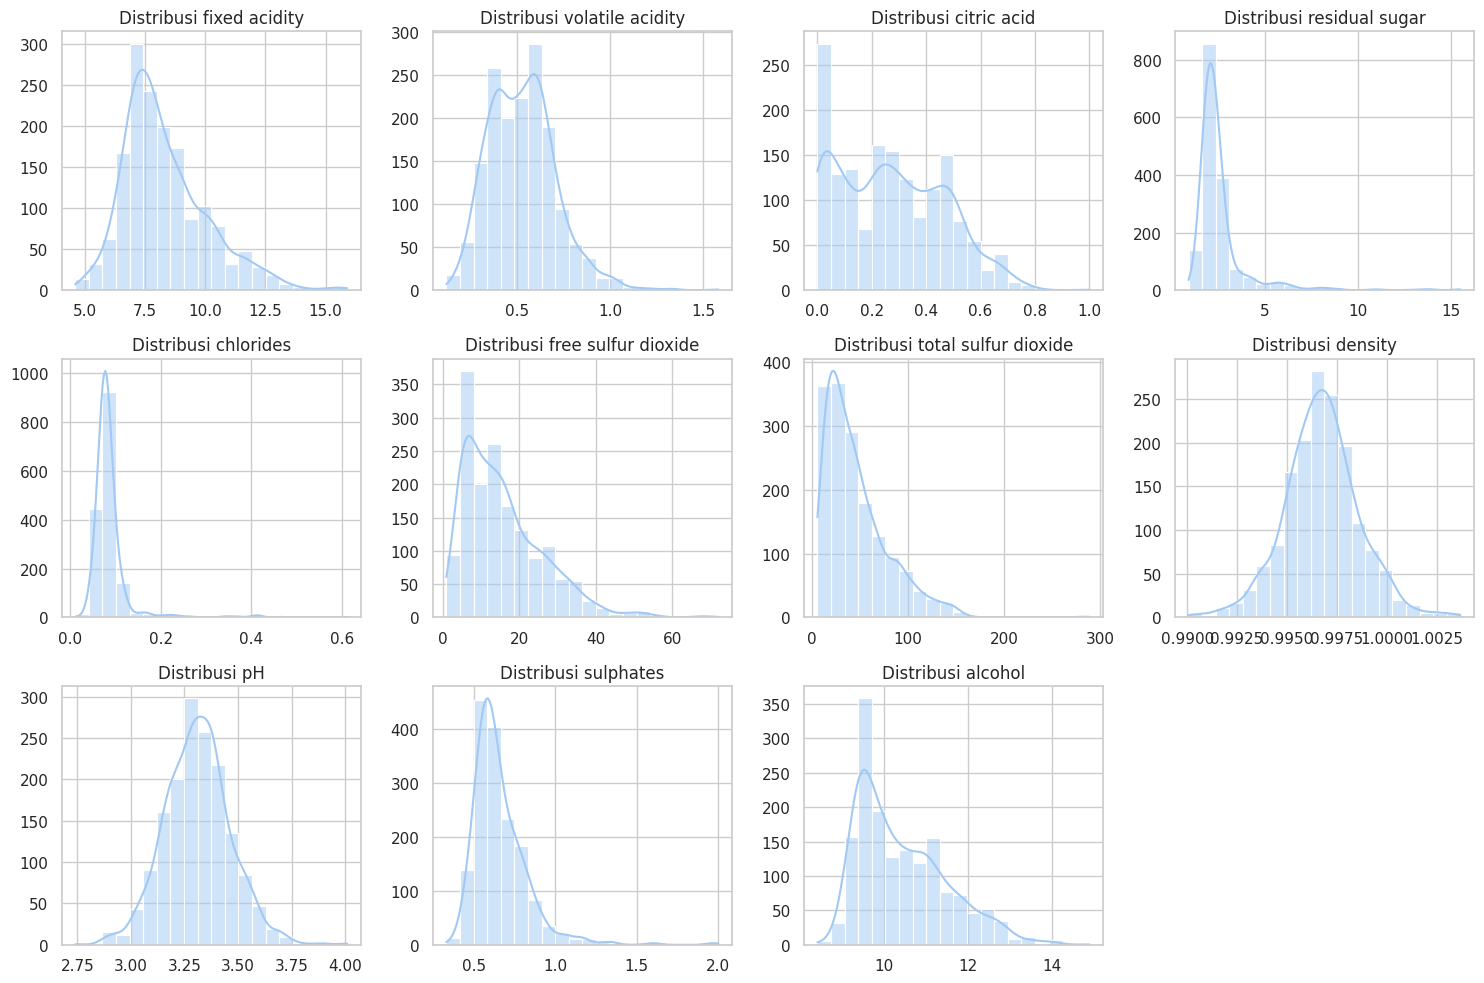

In [7]:
if 'df_raw' in locals():
    print("--- 5. Univariate Analysis (Distribusi Fitur Input) ---")

    features = df_raw.columns.drop('quality') # Semua kolom kecuali 'quality'

    print("Menampilkan histogram untuk setiap fitur input:")
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):
        plt.subplot(3, 4, i+1) # Membuat grid 3x4 untuk 11 fitur
        sns.histplot(df_raw[feature], kde=True, bins=20)
        plt.title(f'Distribusi {feature}')
        plt.xlabel('')
        plt.ylabel('')

    plt.tight_layout() # Merapikan layout
    plt.show()


Setelah memahami target, saya menganalisis distribusi semua 11 fitur input menggunakan histplot. Visualisasi ini menunjukkan bahwa banyak fitur (seperti residual sugar, chlorides, dan free sulfur dioxide) memiliki distribusi yang sangat miring (skewed) atau tidak normal, yang juga akan ditangani oleh proses StandardScaler di tahap preprocessing.

## 4.5 MultiVariate Analysis

### 4.5.1. Matrik Kolerasi Fitur

Multivariate Analysis (Matriks Korelasi Heatmap)


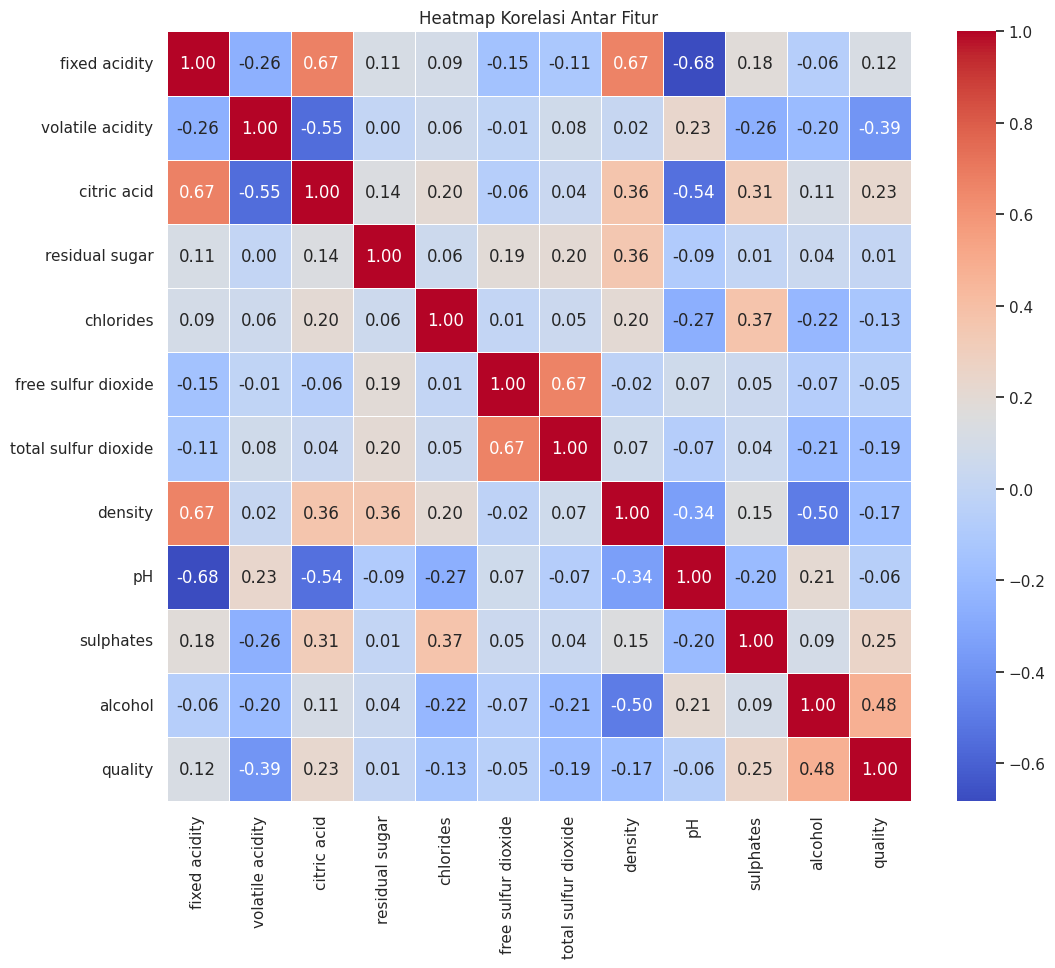

In [8]:
if 'df_raw' in locals():
    print("Multivariate Analysis (Matriks Korelasi Heatmap)")

    plt.figure(figsize=(12, 10))

    # Hitung matriks korelasi
    corr_matrix = df_raw.corr()

    # Buat heatmap
    sns.heatmap(
        corr_matrix,
        annot=True, # Menampilkan angka korelasi
        fmt='.2f',  # Format 2 angka desimal
        cmap='coolwarm', # Skema warna
        linewidths=0.5
    )
    plt.title('Heatmap Korelasi Antar Fitur')
    plt.show()

Untuk memahami bagaimana fitur saling berinteraksi, saya membuat heatmap dari matriks korelasi. Ini adalah analisis yang paling kompleks karena memetakan hubungan antara semua pasangan variabel secara bersamaan. Heatmap ini memberikan gambaran visual yang cepat tentang fitur mana yang saling terkait erat (positif atau negatif).

### 4.5.2 Korelasi Spesifik Ke Target

--- 7. Multivariate Analysis (Korelasi terhadap 'quality') ---
Fitur yang paling berkorelasi dengan 'quality':


,quality
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919
total sulfur dioxide,-0.185100



Temuan Kritis dari EDA:
1. 'alcohol' (0.48) memiliki korelasi positif terkuat.
2. 'volatile acidity' (-0.39) memiliki korelasi negatif terkuat.

--- Visualisasi Hubungan Terkuat (Scatter Plot) ---


/tmp/ipython-input-1805018596.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


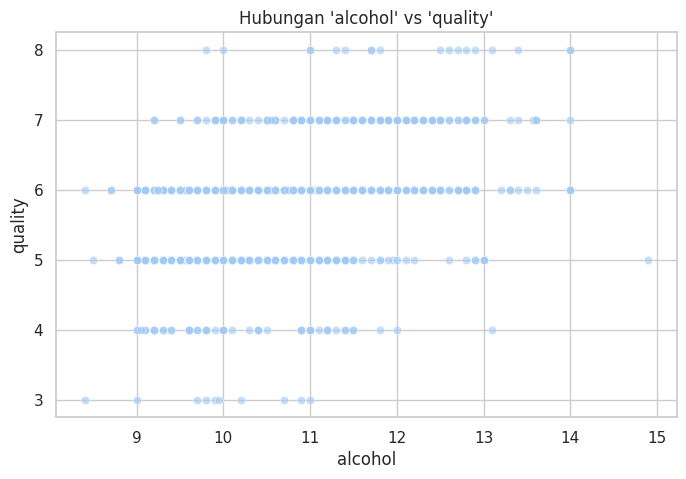

In [9]:
if 'corr_matrix' in locals():
    print("--- 7. Multivariate Analysis (Korelasi terhadap 'quality') ---")

    # Ambil korelasi terhadap 'quality', urutkan, dan hapus korelasi ke diri sendiri
    corr_to_quality = corr_matrix['quality'].drop('quality').sort_values(ascending=False)

    print("Fitur yang paling berkorelasi dengan 'quality':")
    display(corr_to_quality)

    # Temuan Penting:
    print("\nTemuan Kritis dari EDA:")
    print("1. 'alcohol' (0.48) memiliki korelasi positif terkuat.")
    print("2. 'volatile acidity' (-0.39) memiliki korelasi negatif terkuat.")

    print("\n--- Visualisasi Hubungan Terkuat (Scatter Plot) ---")
    # Mari kita lihat hubungan terkuat (alkohol) secara visual
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        x='alcohol',
        y='quality',
        data=df_raw,
        alpha=0.6, # Transparansi
        palette='viridis'
    )
    plt.title("Hubungan 'alcohol' vs 'quality'")
    plt.show()

Dari heatmap tersebut, saya memfilter korelasi spesifik terhadap quality. Temuan terpenting dari EDA ini adalah: alcohol memiliki korelasi positif terkuat (0.48) dan volatile acidity memiliki korelasi negatif terkuat (-0.39) terhadap kualitas anggur.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## 5.1 Menghapus Data Duplikat

In [10]:
if 'df_raw' in locals():
    # Salin data mentah ke dataframe baru untuk diproses
    df_processed = df_raw.copy()

    # Menghapus duplikat
    initial_count = len(df_processed)
    df_processed.drop_duplicates(inplace=True)

    print(f"Baris data duplikat yang dihapus: {initial_count - len(df_processed)}")
    print(f"Data setelah duplikat dihapus: {len(df_processed)} baris")

Baris data duplikat yang dihapus: 240
Data setelah duplikat dihapus: 1359 baris


## 5.2 Binning Target Quality

In [11]:
if 'df_processed' in locals():
    # 1. Binerisasi: Kualitas >= 7 adalah 'Baik' (1), lainnya 'Buruk' (0)
    df_processed['is_good'] = np.where(df_processed['quality'] >= 7, 1, 0)

    # 2. Hapus kolom 'quality' yang lama
    df_processed = df_processed.drop('quality', axis=1)

    print("Variabel target 'quality' telah dibinerisasi menjadi 'is_good'.")
    print("\nDistribusi Kelas Biner:")
    print(df_processed['is_good'].value_counts(normalize=True))

Variabel target 'quality' telah dibinerisasi menjadi 'is_good'.

Distribusi Kelas Biner:
is_good
0    0.864606
1    0.135394
Name: proportion, dtype: float64


## 5.3 Standard Scaling

In [12]:
if 'df_processed' in locals():
    # Pisahkan fitur (X) dan target (y)
    X = df_processed.drop('is_good', axis=1)
    y = df_processed['is_good']

    # Simpan nama kolom
    feature_columns = X.columns

    # Inisialisasi dan terapkan StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Ubah kembali ke DataFrame
    X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)

    print("Standard Scaling berhasil diterapkan pada semua fitur input.")
    display(X_scaled_df.describe().T[['mean', 'std']].head())

Standard Scaling berhasil diterapkan pada semua fitur input.


,mean,std
fixed acidity,-6.274108e-16,1.000368
volatile acidity,1.463959e-16,1.000368
citric acid,2.091369e-17,1.000368
residual sugar,-1.202537e-16,1.000368
chlorides,4.182739e-17,1.000368


## 5.4 Penggabungan Data

In [13]:
if 'X_scaled_df' in locals():
    # Gabungkan X_scaled dengan target y
    final_df = pd.concat([X_scaled_df.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

    print("--- 5 Baris Pertama Data Final (Telah Diproses) ---")
    display(final_df.head())

    print("\nData sudah bersih, dibinerisasi, dan diskalakan. Siap untuk Model Training.")

--- 5 Baris Pertama Data Final (Telah Diproses) ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_good
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374,0
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575,0
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575,0
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575,0
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374,0



Data sudah bersih, dibinerisasi, dan diskalakan. Siap untuk Model Training.
